# WeatherPy
----

#### Analysis
Observation:  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Negative linear relationship – The temperature decreases as we move further away from the equator and latitude increases.

Observation: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Positive linear relationship – The temperature increases as we move towards the equator and latitude increases.

Observation: Northern and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
No correlation is shown between humidity and latitude for the Norther and Southern Hemispheres and no strong relationship between cloudiness and latitude for both the Northern and Southern Hemispheres.


In [54]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
process_record = 0
set_counter = 1
cities_weather = []

for city in cities:
    
     # Increase counter by one 
    process_record += 1
    print(f"Processing Record {process_record} of Set {set_counter} | {city}")

    if(process_record==50):
        set_counter+=1
        process_record=0
    
    query_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"

    try:
        response = requests.get(query_url).json()
        cities_weather.append({'City':city,
                               'Lat':response['coord']['lat'],
                               'Lng':response['coord']['lon'],
                               'Max Temp':response['main']['temp_max'],
                               'Humidity':response['main']['humidity'],
                               'Cloudiness':response['clouds']['all'],
                               'Wind Speed':response['wind']['speed'],
                               'Country':response['sys']['country'],
                               'Date':response['dt']})
    except:
        print('City not found. Skipping...')
        pass
        
    
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | grand gaube
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | smithers
Processing Record 10 of Set 1 | ahipara
Processing Record 11 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | camana
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | elk plain
Processing Record 22

City not found. Skipping...
Processing Record 40 of Set 4 | isangel
Processing Record 41 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 42 of Set 4 | kytmanovo
Processing Record 43 of Set 4 | tucumcari
Processing Record 44 of Set 4 | aksu
Processing Record 45 of Set 4 | coihaique
Processing Record 46 of Set 4 | krasnoselkup
Processing Record 47 of Set 4 | mitsamiouli
Processing Record 48 of Set 4 | viedma
Processing Record 49 of Set 4 | tolaga bay
Processing Record 50 of Set 4 | natal
Processing Record 1 of Set 5 | saiha
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | caba
Processing Record 4 of Set 5 | saint anthony
Processing Record 5 of Set 5 | synya
Processing Record 6 of Set 5 | mangai
Processing Record 7 of Set 5 | yumen
Processing Record 8 of Set 5 | opuwo
Processing Record 9 of Set 5 | paita
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | mayor pablo lagerenza
Processing Record 12 of Set 5 | barentsburg
City not f

City not found. Skipping...
Processing Record 31 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 32 of Set 8 | tongliao
Processing Record 33 of Set 8 | canmore
Processing Record 34 of Set 8 | kodiak
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | whitehorse
Processing Record 37 of Set 8 | lewistown
Processing Record 38 of Set 8 | solnechnyy
Processing Record 39 of Set 8 | lubbock
Processing Record 40 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 8 | karlskrona
Processing Record 42 of Set 8 | severo-yeniseyskiy
Processing Record 43 of Set 8 | liverpool
Processing Record 44 of Set 8 | moron
Processing Record 45 of Set 8 | bonfim
Processing Record 46 of Set 8 | sakakah
Processing Record 47 of Set 8 | severnoye
Processing Record 48 of Set 8 | mahajanga
Processing Record 49 of Set 8 | kalabo
Processing Record 50 of Set 8 | omboue
Processing Record 1 of Set 9 | soyo
Processing R

Processing Record 18 of Set 12 | puerto asis
Processing Record 19 of Set 12 | daru
Processing Record 20 of Set 12 | otjimbingwe
Processing Record 21 of Set 12 | sinkat
City not found. Skipping...
Processing Record 22 of Set 12 | igarka
Processing Record 23 of Set 12 | karatuzskoye
Processing Record 24 of Set 12 | shache
Processing Record 25 of Set 12 | naryan-mar
Processing Record 26 of Set 12 | apollonia
Processing Record 27 of Set 12 | verkh-usugli
Processing Record 28 of Set 12 | bang saphan
Processing Record 29 of Set 12 | lincoln
Processing Record 30 of Set 12 | yemelyanovo
Processing Record 31 of Set 12 | xinyu
Processing Record 32 of Set 12 | curup
Processing Record 33 of Set 12 | xadani
City not found. Skipping...
Processing Record 34 of Set 12 | denpasar
Processing Record 35 of Set 12 | tautira
Processing Record 36 of Set 12 | ust-omchug
Processing Record 37 of Set 12 | grootfontein
Processing Record 38 of Set 12 | auki
Processing Record 39 of Set 12 | siilinjarvi
Processing R

In [11]:
cities = pd.DataFrame(cities_weather)
cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.37,-73.41,69.80,77,75,4.70,US,1596853639
1,tasiilaq,65.61,-37.64,44.60,75,21,18.34,GL,1596853639
2,te anau,-45.42,167.72,45.39,63,5,1.10,NZ,1596853423
3,east london,-33.02,27.91,54.10,69,49,9.31,ZA,1596853639
4,grand gaube,-20.01,57.66,64.40,88,40,3.36,MU,1596853639


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cities.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [14]:
# Display the DataFrame
cities = pd.DataFrame(cities_weather)
cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.37,-73.41,69.80,77,75,4.70,US,1596853639
1,tasiilaq,65.61,-37.64,44.60,75,21,18.34,GL,1596853639
2,te anau,-45.42,167.72,45.39,63,5,1.10,NZ,1596853423
3,east london,-33.02,27.91,54.10,69,49,9.31,ZA,1596853639
4,grand gaube,-20.01,57.66,64.40,88,40,3.36,MU,1596853639
...,...,...,...,...,...,...,...,...,...
565,aykhal,66.00,111.50,64.40,68,1,2.24,RU,1596853689
566,iowa city,41.66,-91.53,75.20,69,1,10.29,US,1596853689
567,dhidhdhoo,6.88,73.10,82.45,75,100,16.89,MV,1596853466
568,san felipe,10.34,-68.74,73.00,91,66,1.48,VE,1596853689


In [18]:
# Export the data to csv
cities.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# Display a statistical overview of the DataFrame 
cities.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,21.347684,20.471596,67.955579,72.482456,50.450877,7.512281,1.596854e+09
std,33.993102,89.477077,13.108514,20.236403,40.258635,5.315983,8.403757e+01
min,-54.800000,-175.200000,35.600000,3.000000,0.000000,0.450000,1.596853e+09
25%,-5.865000,-56.025000,57.602500,61.000000,3.000000,3.360000,1.596854e+09
50%,24.940000,23.210000,69.275000,77.500000,48.500000,5.860000,1.596854e+09
75%,52.250000,96.305000,78.010000,88.000000,92.750000,10.290000,1.596854e+09
max,78.220000,179.320000,100.540000,100.000000,100.000000,33.040000,1.596854e+09


In [22]:
# Cities that have humidity > 100%.
indices = cities.index[weather_data_df['Humidity'] > 100].tolist()
len(indices)

0

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities.drop(indices, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.37,-73.41,69.80,77,75,4.70,US,1596853639
1,tasiilaq,65.61,-37.64,44.60,75,21,18.34,GL,1596853639
2,te anau,-45.42,167.72,45.39,63,5,1.10,NZ,1596853423
3,east london,-33.02,27.91,54.10,69,49,9.31,ZA,1596853639
4,grand gaube,-20.01,57.66,64.40,88,40,3.36,MU,1596853639


In [80]:
# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/clean_city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

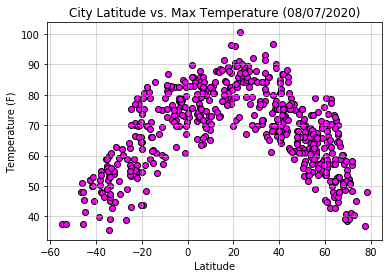

In [81]:
# Latitude Vs Temperature Scatter Plot 
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],facecolors = "magenta", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

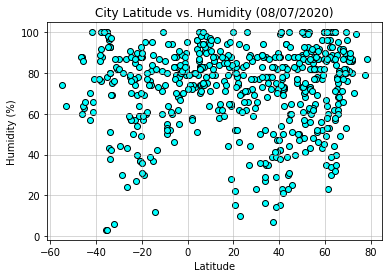

In [82]:
# Latitude vs. Humidity Scatter Plot 
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],facecolors = "cyan", edgecolors ="black",marker ="o")
plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

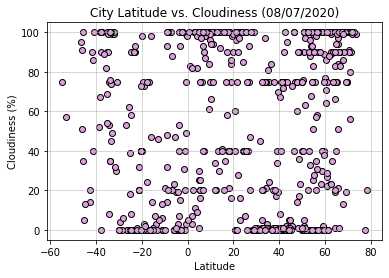

In [83]:
# Latitude vs. Cloudiness Scatter Plot - **ADD CLEAN DATAFRAME?
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],facecolors = "plum", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

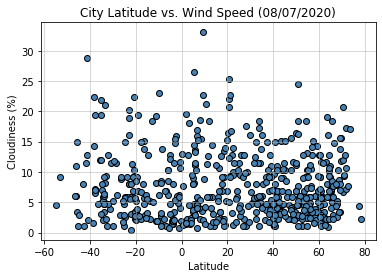

In [84]:
# Latitude vs. Wind Speed Scatter Plot 
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],facecolors = "steelblue", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_WindSpeed.png")

plt.show()

## Linear Regression

In [85]:
def plot_linregress(X, y, title):
    print(f"The r-squared is: {round(st.pearsonr(X, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(X, y)
    regress_values = X * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
    plt.scatter(X, y)
    plt.plot(X,regress_values,"r-")
    plt.title(title + '\n' + line_eq)
    plt.xlabel(X.name)
    plt.ylabel(y.name)


In [96]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_city_data.loc[clean_city_data['Lat'] >= 0]
print('northern_hemisphere_df.shape', northern_hemisphere_df.shape)

southern_hemisphere_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
print('southern_hemisphere_df.shape', southern_hemisphere_df.shape)

northern_hemisphere_df.shape (397, 9)
southern_hemisphere_df.shape (173, 9)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.71


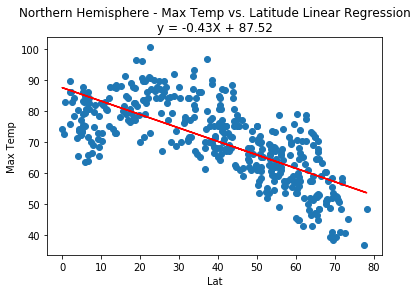

In [97]:
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'], 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.79


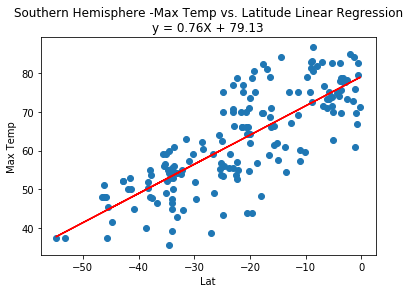

In [88]:
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'], 'Southern Hemisphere -Max Temp vs. Latitude Linear Regression')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.03


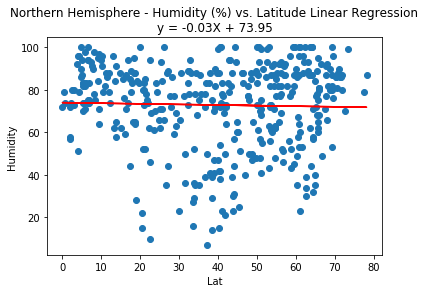

In [89]:
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'], 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03


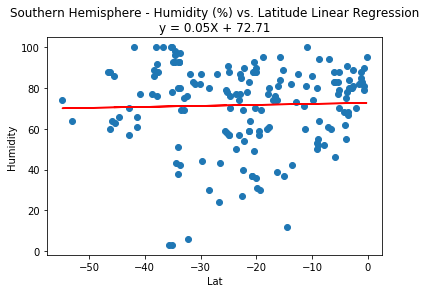

In [90]:
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02


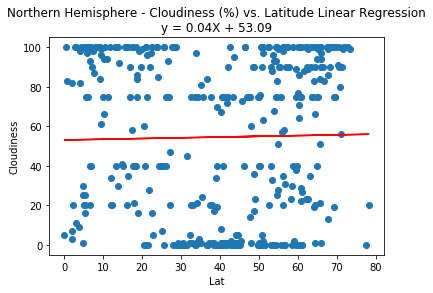

In [92]:
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'], 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.27


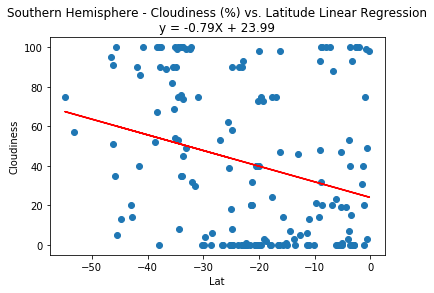

In [93]:
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'], 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08


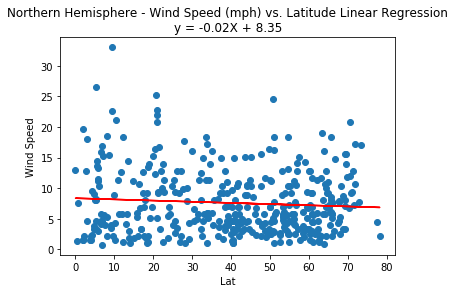

In [94]:
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'], 'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12


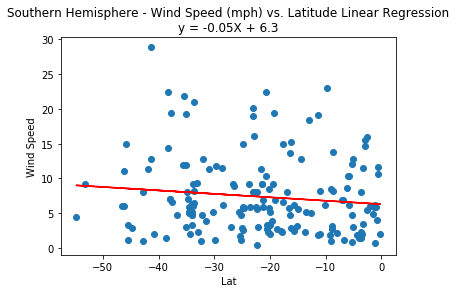

In [95]:
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'], 'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')